In [12]:
%matplotlib inline 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from pandas_profiling import ProfileReport
import numpy as np

In [2]:
df = pd.read_csv('data/data_Inmeta.csv', sep=';', header=0)
df.head(20)

Y  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0   13500         23      46986        1.0         90          1          0   
1   13750         23      72937        1.0         90          1          0   
2   13950         24      41711        1.0         90          1          0   
3   14950         26      48000        1.0         90          0          0   
4   13750         30      38500        1.0         90          0          0   
5   12950         32      61000        1.0         90          0          0   
6   16900         27      94612        1.0         90          1          0   
7   18600         30      75889        1.0         90          1          0   
8   21500         27      19700        0.0        192          0          0   
9   12950         23      71138        1.0         69          0          0   
10  20950         25      31461        0.0        192          0          0   
11  19950         22      43610        0.0        192          0          0   
12  19600         25      32189        0.0        192          0          0   
13  21500         31      23000        0.0        192          1          0   
14  22500         32      34131        0.0        192          1          0   
15  22000         28      18739        0.0        192          0          0   
16  22750         30      34000        0.0        192          1          0   
17  17950         24      21716        0.0        110          1          0   
18  16750         24      25563        0.0        110          0          0   
19  16950         30      64359        0.0        110          1          0   

    Feature 7  Feature 8  Feature 9  
0        2000          3       1165  
1        2000          3       1165  
2        2000          3       1165  
3        2000          3       1165  
4        2000          3       1170  
5        2000          3       1170  
6        2000          3       1245  
7        2000          3       1245  
8        1800          3       1185  
9        1900          3       1105  
10       1800          3       1185  
11       1800          3       1185  
12       1800          3       1185  
13       1800          3       1185  
14       1800          3       1185  
15       1800          3       1185  
16       1800          3       1185  
17       1600          3       1105  
18       1600          3       1065  
19       1600          3       1105

# Exploratory Data Analysis

## General

In [3]:
print(df.describe())
print(df.info())

                  Y    Feature 1      Feature 2   Feature 3    Feature 4  \
count   1436.000000  1436.000000    1436.000000  414.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749    0.173913   101.502089   
std     3626.964585    18.599988   37506.448872    0.379493    14.981080   
min     4350.000000     1.000000       1.000000    0.000000    69.000000   
25%     8450.000000    44.000000   43000.000000    0.000000    90.000000   
50%     9900.000000    61.000000   63389.500000    0.000000   110.000000   
75%    11950.000000    70.000000   87020.750000    0.000000   110.000000   
max    32500.000000    80.000000  243000.000000    1.000000   192.000000   

         Feature 5    Feature 6    Feature 7    Feature 8   Feature 9  
count  1436.000000  1436.000000  1436.000000  1436.000000  1436.00000  
mean      0.674791     0.055710  1566.827994     4.033426  1072.45961  
std       0.468616     0.229441   187.182436     0.952677    52.64112  
min       0.000000     0.00

Binary features: 3, 5, 6, Mising values features: 3
Scales are different between features.

## Correlation analysis

Text(0.5, 1.0, 'Heatmap of feature correlations')

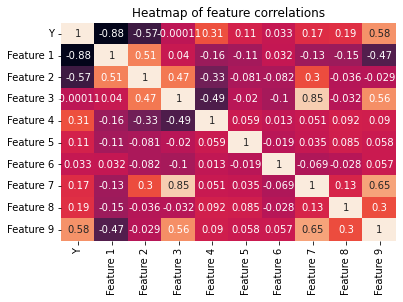

In [4]:
sns.heatmap(df.corr(), annot=True, cbar=False)
plt.title('Heatmap of feature correlations')

## Missing values, duplicated values

<AxesSubplot:title={'center':'Heatmap for missing values'}>

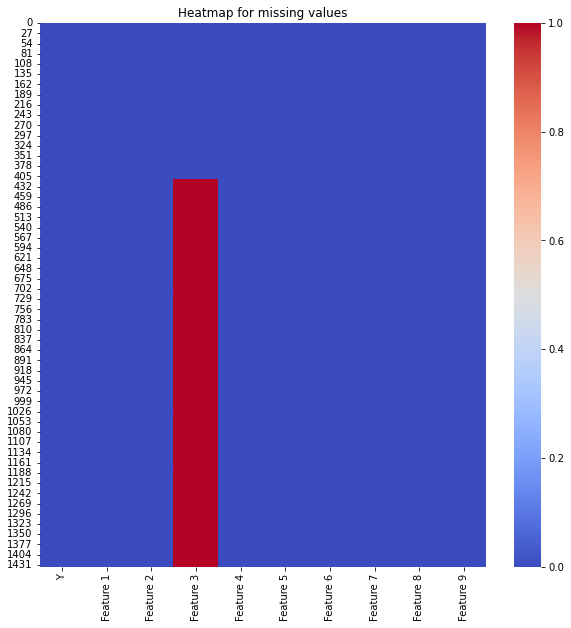

In [5]:
plt.figure(figsize=(10, 10))
plt.title('Heatmap for missing values')
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=True)

In [6]:
# Find the duplications
df[df.duplicated(keep=False)]

Y  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
112  24950          8      13253        1.0        116          1          0   
113  24950          8      13253        1.0        116          1          0   

     Feature 7  Feature 8  Feature 9  
112       2000          5       1320  
113       2000          5       1320

## Univariate Y analysis

Number of points above 99.5 percentile extreme:  8
Number of points below 0.5 percentile extreme:  8


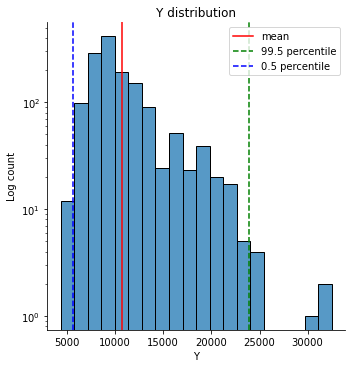

In [7]:
sns.displot(df['Y'], bins=20)
plt.yscale('log')
plt.axvline(df['Y'].mean(), c='red', label='mean')
plt.axvline(np.percentile(df['Y'], q=99.5), linestyle='--', color='g', label='99.5 percentile')
plt.axvline(np.percentile(df['Y'], q=0.5), linestyle='--', color='b', label='0.5 percentile')

plt.ylabel('Log count')
plt.title('Y distribution')
plt.legend()
print('Number of points above 99.5 percentile extreme: ', len(df[df['Y'] > np.percentile(df['Y'], q=99.5)]))
print('Number of points below 0.5 percentile extreme: ', len(df[df['Y'] < np.percentile(df['Y'], q=0.5)]))

## Bivariate analysis

Text(0.5, 1.0, 'Trendline between Y and feature 9')

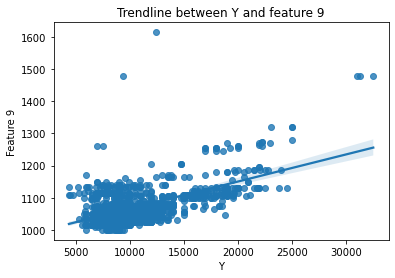

In [8]:
sns.regplot(x='Y', y='Feature 9', data=df)
plt.title('Trendline between Y and feature 9')

Text(0.5, 1.0, 'Trendline between Y and feature 2')

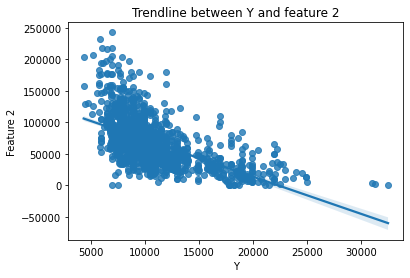

In [9]:
sns.regplot(x='Y', y='Feature 2', data=df)
plt.title('Trendline between Y and feature 2')

Text(0.5, 1.0, 'Trendline between Y and feature 9')

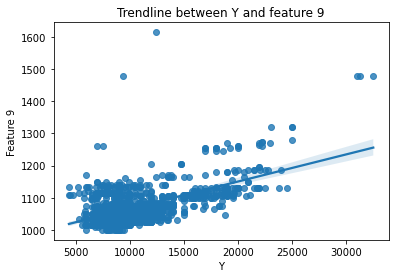

In [10]:
sns.regplot(x='Y', y='Feature 9', data=df)
plt.title('Trendline between Y and feature 9')

In [13]:
# Pandas profiling
profile = ProfileReport(df)
profile

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]


# Data Preprocessing

* Ideas: drop feature 3, drop last duplication, scale set of features

## Drop missing column and duplicated row

In [25]:
# Drop column feature 3
df_clean = df.drop('Feature 3', axis=1)
# Drop duplicates
df_clean = df_clean.drop_duplicates(keep='first')

In [26]:
# Filter outliers using 0.5, 99.5 percentile
df_clean = df_clean[df_clean['Y'] > np.percentile(df_clean['Y'], q=0.5)]
df_clean = df_clean[df_clean['Y'] <= np.percentile(df_clean['Y'], q=99.5)]
print('Shape after filter ', df_clean.shape)

Shape after filter  (1419, 9)


## Seperate X, y

In [27]:
X = df_clean.drop(['Y', 'Feature 1'], axis=1)
# X = np.array(df_clean['Feature 1']).reshape(-1, 1)
y = df_clean['Y']

## Scaler

In [28]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
X = scl.fit_transform(X)


In [29]:
pd.DataFrame(X).describe()

0            1            2            3            4  \
count  1419.000000  1419.000000  1419.000000  1419.000000  1419.000000   
mean      0.281617     0.264167     0.673714     0.056378     0.376890   
std       0.151544     0.119675     0.469019     0.230731     0.264123   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.177198     0.170732     0.000000     0.000000     0.142857   
50%       0.261112     0.333333     1.000000     0.000000     0.428571   
75%       0.357792     0.333333     1.000000     0.000000     0.428571   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                 5            6  
count  1419.000000  1419.000000  
mean      0.675123     0.115142  
std       0.317574     0.078096  
min       0.000000     0.000000  
25%       0.333333     0.065041  
50%       0.666667     0.105691  
75%       1.000000     0.138211  
max       1.000000     1.000000

## PCA (disabled)

In [30]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=4)
# X = pca.fit_transform(X)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')

## Train test split

In [31]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Utils

In [32]:
#Visualization code

def vis(y_test, y_pred):

    # Distribution on the line
    fig, ax = plt.subplots(3, 1, figsize=(20,20))
    ax[0].scatter(y_pred, y_test, color='red')
    ax[0].set_xlabel('Predictions', fontsize = 15)
    ax[0].set_ylabel('Ground truths', fontsize = 15)
    ax[0].set_title('Predictions x Ground truths on dataset', fontsize = 15)
    ax[0].plot([0, max(y_test)], [0, max(y_test)], 'g--')

    # Scatter overlapping
    x = range(len(y_test))
    ax[1].scatter(x, y_test, color='blue', label='Ground truth', marker='o')
    ax[1].scatter(x, y_pred, color='green', label='Predictions', marker='x')
    ax[1].legend(loc='upper right')
    ax[1].set_title('Scatter plot of ground truth and prediction', fontsize = 15)

    # Residual histogram
    sns.histplot(abs(y_pred - y_test), ax=ax[2], bins=10)
    ax[2].set_title('Residuals distribution', fontsize = 15)
    
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('MAE: ', mean_absolute_error(y_test, y_pred))
    print('r2_score: ', r2_score(y_test, y_pred))


    plt.show()
    

In [33]:
def read_cv_test_result(cv_dict, cv=5):
    dic = dict()
    for key in cv_dict.keys():
        if key.startswith('test'):
            dic['Average {}-fold '.format(cv)+key] = cv_dict[key].mean()
            # print('Average {}-fold '.format(cv)+key)
            # print(cv_dict[key].mean())
    
    print(pd.DataFrame(cv_dict).head(20))
    return(dic)


# Data modelling

* Objective 1: visualize predictive capacity of models -> Hold out validation, rate 80/20
* Objective 2: overview picture of model robustness --> 5-fold cross validation
* Metrics:
** r2: portion of variance of expected output can be explained by input features, 1 is the perfect scenario
** mae: mean residual between ground truths and predictions
** rmse: mean square root error between ground truths and predictions, emphasize on big errors.

In [34]:
cv_scoring_metrics = ('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_root_mean_squared_error')
folds = KFold(n_splits=5, shuffle=True, random_state=123)

## Linear Regression

MSE: 5446551.758131841
MAE:  1457.0598725375817
r2_score:  0.5345210797434321


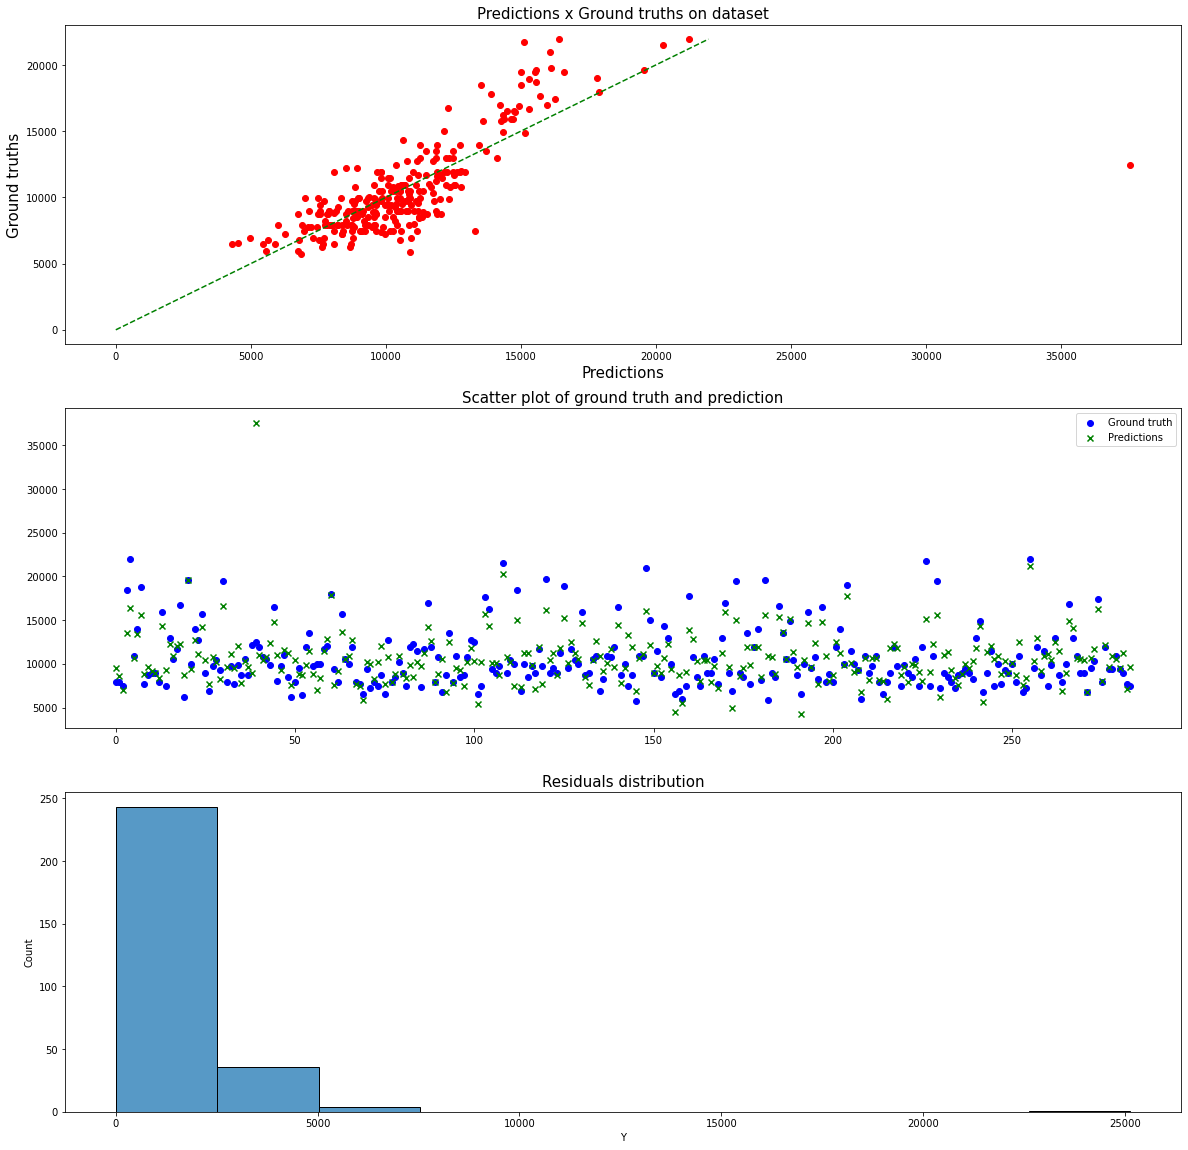

In [35]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
vis(y_test, y_predict)

In [36]:
# Cross validation
lr_cv_scores = cross_validate(lr, X, y, cv=folds, scoring=cv_scoring_metrics)
lr_dict = read_cv_test_result(lr_cv_scores)

   fit_time  score_time   test_r2  test_neg_mean_squared_error  \
0  0.001971    0.001000  0.534521                -5.446552e+06   
1  0.000999    0.001999  0.643064                -4.126874e+06   
2  0.001000    0.001002  0.672160                -3.876456e+06   
3  0.001000    0.001000  0.497380                -5.204414e+06   
4  0.001001    0.001998  0.625633                -4.246088e+06   

   test_neg_mean_absolute_error  test_neg_root_mean_squared_error  
0                  -1457.059873                      -2333.784857  
1                  -1591.684212                      -2031.470854  
2                  -1499.351604                      -1968.871801  
3                  -1577.160506                      -2281.318572  
4                  -1516.415917                      -2060.603812  


## Decision Tree

MSE: 4090124.1267605633
MAE:  1464.2676056338028
r2_score:  0.6504455209853972


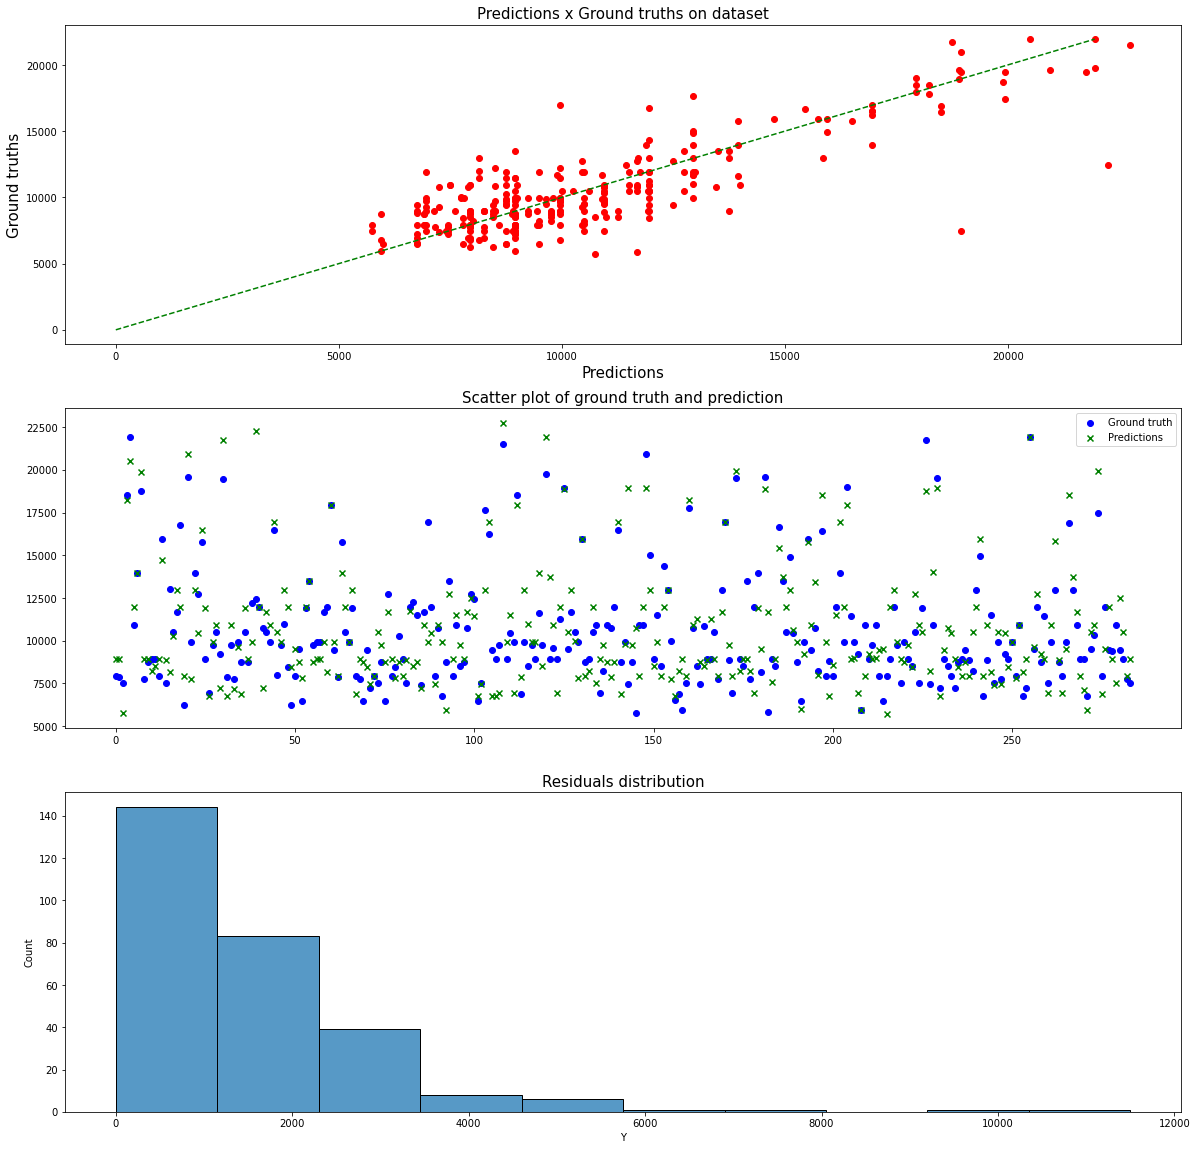

In [37]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
dc = DecisionTreeRegressor()
dc.fit(X_train, y_train)
dc_pred = dc.predict(X_test)
vis(y_test, dc_pred)

In [38]:
dc_cv_scores = cross_validate(dc, X, y, cv=folds, scoring=cv_scoring_metrics)
dc_dict = read_cv_test_result(dc_cv_scores)

   fit_time  score_time   test_r2  test_neg_mean_squared_error  \
0  0.002999    0.001000  0.650124                -4.093887e+06   
1  0.002999    0.002002  0.565973                -5.018198e+06   
2  0.002999    0.001001  0.687096                -3.699859e+06   
3  0.002999    0.001002  0.548755                -4.672451e+06   
4  0.002998    0.001002  0.594339                -4.601029e+06   

   test_neg_mean_absolute_error  test_neg_root_mean_squared_error  
0                  -1445.940141                      -2023.335672  
1                  -1603.232394                      -2240.133433  
2                  -1461.936620                      -1923.501709  
3                  -1514.528169                      -2161.585212  
4                  -1539.113074                      -2145.000845  


## Random Forest

MSE: 2286432.0258283257
MAE:  1153.6129342723004
r2_score:  0.8045945475440309


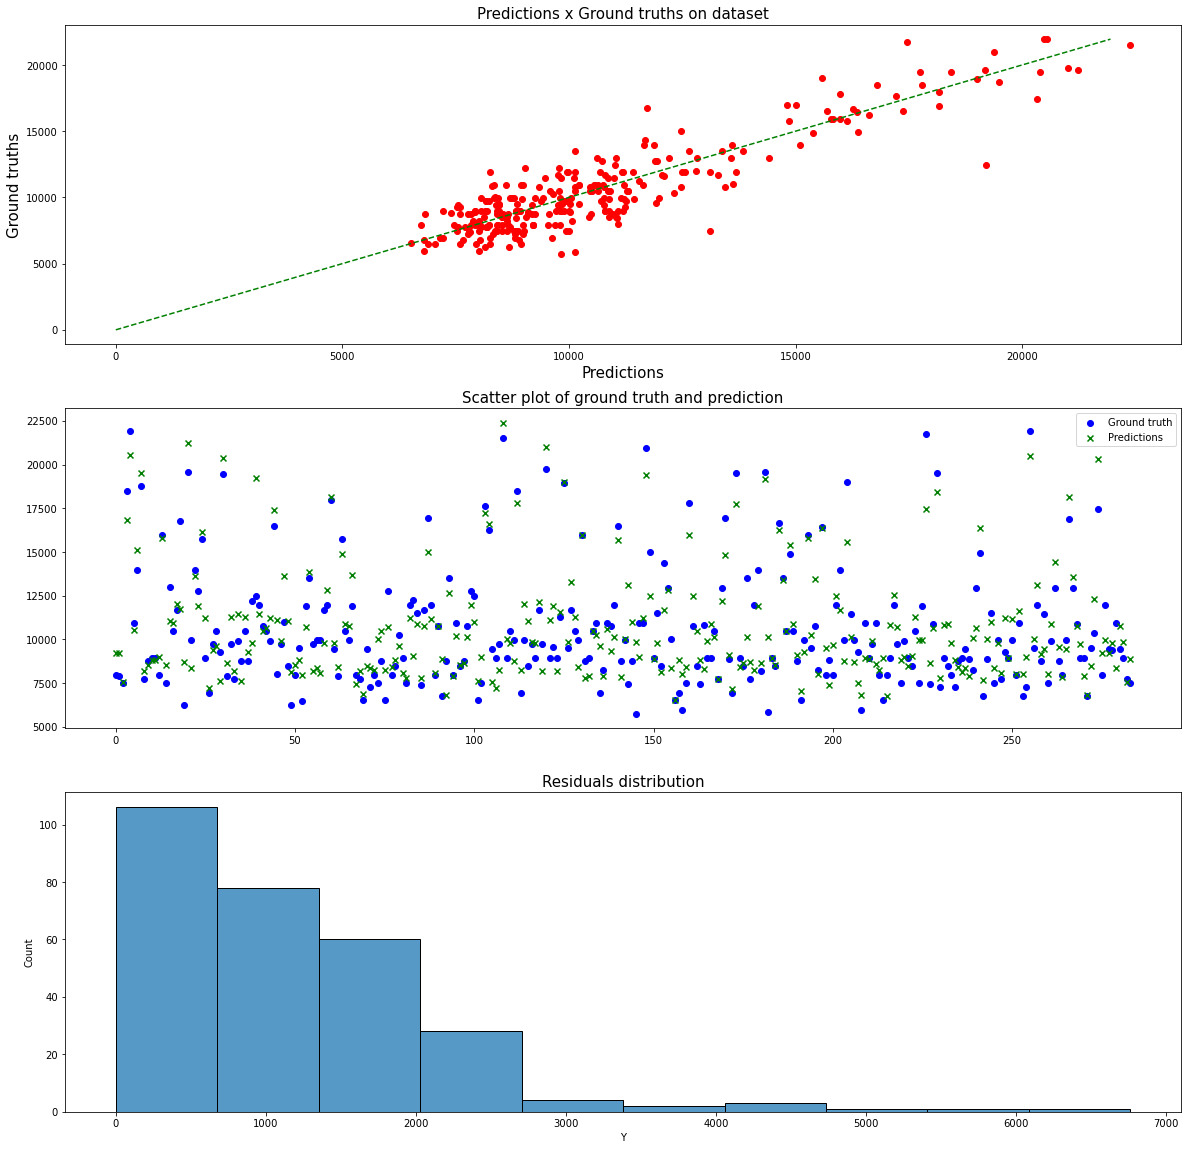

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
vis(y_test, rf_predict)

In [40]:
rf_cv_scores = cross_validate(rf, X, y, cv=folds, scoring=cv_scoring_metrics)
rf_dict = read_cv_test_result(rf_cv_scores)

   fit_time  score_time   test_r2  test_neg_mean_squared_error  \
0  0.251964    0.010995  0.806097                -2.268849e+06   
1  0.245747    0.010948  0.704126                -3.420885e+06   
2  0.278813    0.012001  0.776036                -2.648208e+06   
3  0.250189    0.009598  0.734044                -2.753855e+06   
4  0.249124    0.010997  0.731366                -3.046864e+06   

   test_neg_mean_absolute_error  test_neg_root_mean_squared_error  
0                  -1158.057866                      -1506.269936  
1                  -1307.409119                      -1849.563374  
2                  -1164.619415                      -1627.331551  
3                  -1220.777129                      -1659.474342  
4                  -1216.313889                      -1745.526955  


In [41]:
# feat_importances = pd.Series(rf.feature_importances_, index=['F1', 'F2', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9'])
# feat_importances.nlargest(20).plot(kind='bar')
# plt.title('Feature importance generated by XGBoost')

ValueError: Length of values (7) does not match length of index (8)

## XGBoost

MSE: 2409776.977127213
MAE:  1195.4044172260124
r2_score:  0.7940531119166208


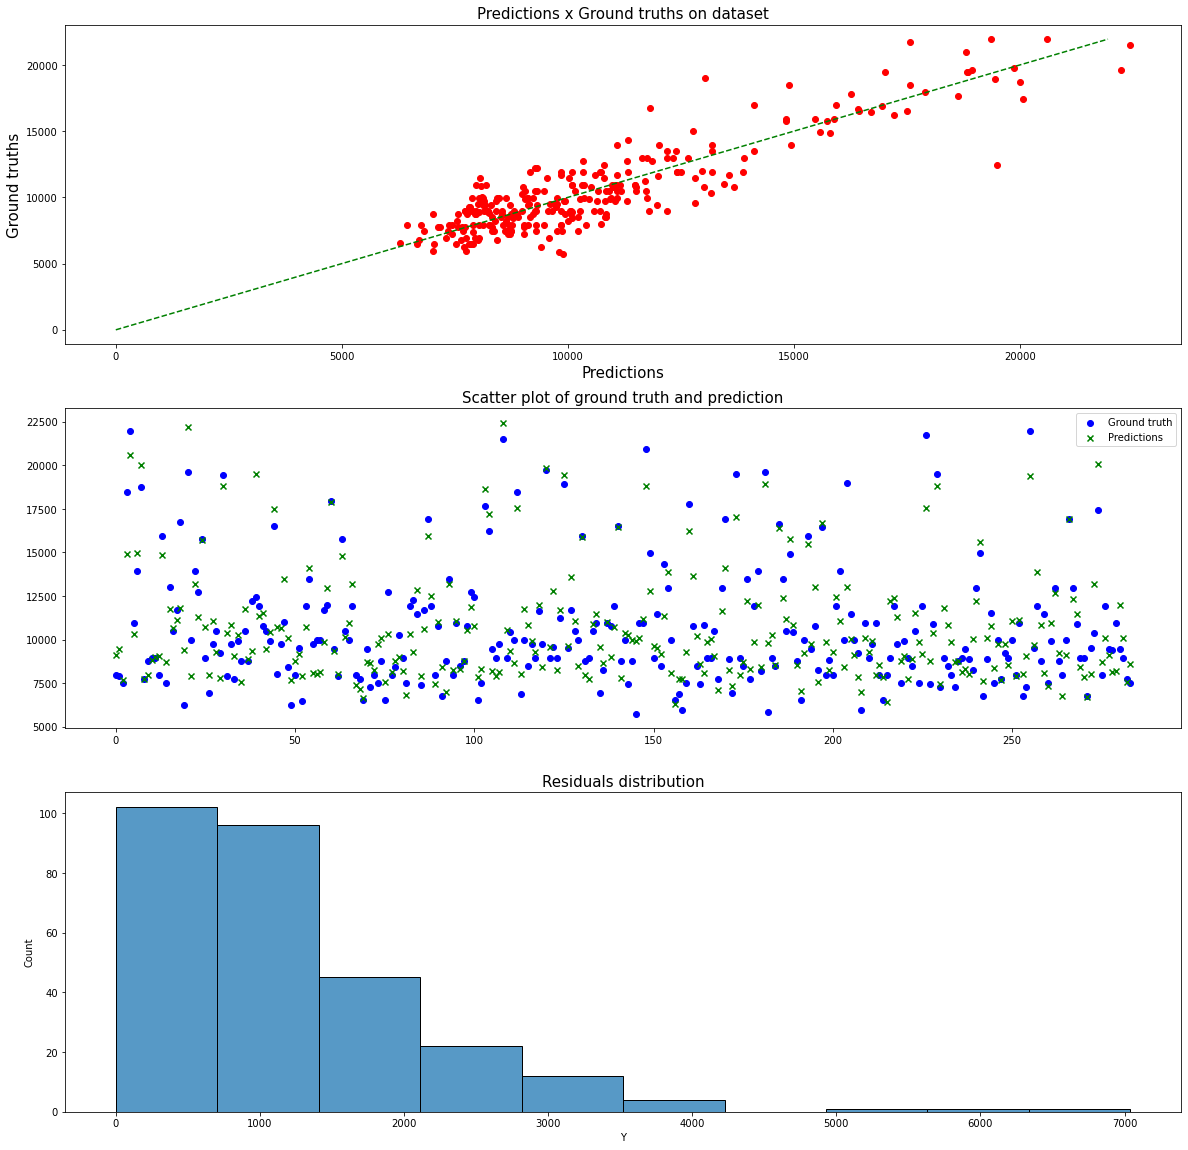

In [42]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(X_train, y_train)
xg_pred = xg.predict(X_test)
vis(y_test, xg_pred)

In [43]:
# feat_importances = pd.Series(xg.feature_importances_, index=X.columns)
# feat_importances.nlargest(20).plot(kind='bar')

In [44]:
xg_cv_scores = cross_validate(xg, X, y, cv=folds, scoring=cv_scoring_metrics)
xg_dict = read_cv_test_result(xg_cv_scores)

   fit_time  score_time   test_r2  test_neg_mean_squared_error  \
0  0.215060    0.006996  0.794053                -2.409777e+06   
1  0.203997    0.007004  0.695942                -3.515509e+06   
2  0.211998    0.006999  0.796699                -2.403886e+06   
3  0.205002    0.006998  0.764612                -2.437342e+06   
4  0.214999    0.006999  0.751750                -2.815667e+06   

   test_neg_mean_absolute_error  test_neg_root_mean_squared_error  
0                  -1195.404417                      -1552.345637  
1                  -1331.576490                      -1874.969118  
2                  -1149.289393                      -1550.446983  
3                  -1184.442795                      -1561.199045  
4                  -1207.781310                      -1677.994867  


## ANN

In [45]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

In [46]:
from tensorflow.keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def build_model(input_shape, depth=3, hidden_nodes=[30, 20, 20, 30], ):
    ann = Sequential()
    ann.add(Input(shape=X_train.shape[1]))

    for i in range(depth):
        if(isinstance(hidden_nodes, list)):
            ann.add(Dense(hidden_nodes[i], activation='relu'))
        elif(isinstance(hidden_nodes, int)):
            ann.add(Dense(hidden_nodes, activation='relu'))

    ann.add(Dense(1, activation='linear'))
    ann.summary()

    ann.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error', coeff_determination])
    return ann

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 1,301
Trainable params: 1,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
36/36 [==============================] - 0s 663us/step - loss: 10679.0928 - mean_absolute_error: 10679.0928 - coeff_determination: -11.5754
Epoch 2/300
36/36 [==============================] - 0s 1ms/step - loss: 10676.7607 - mean_absolute_

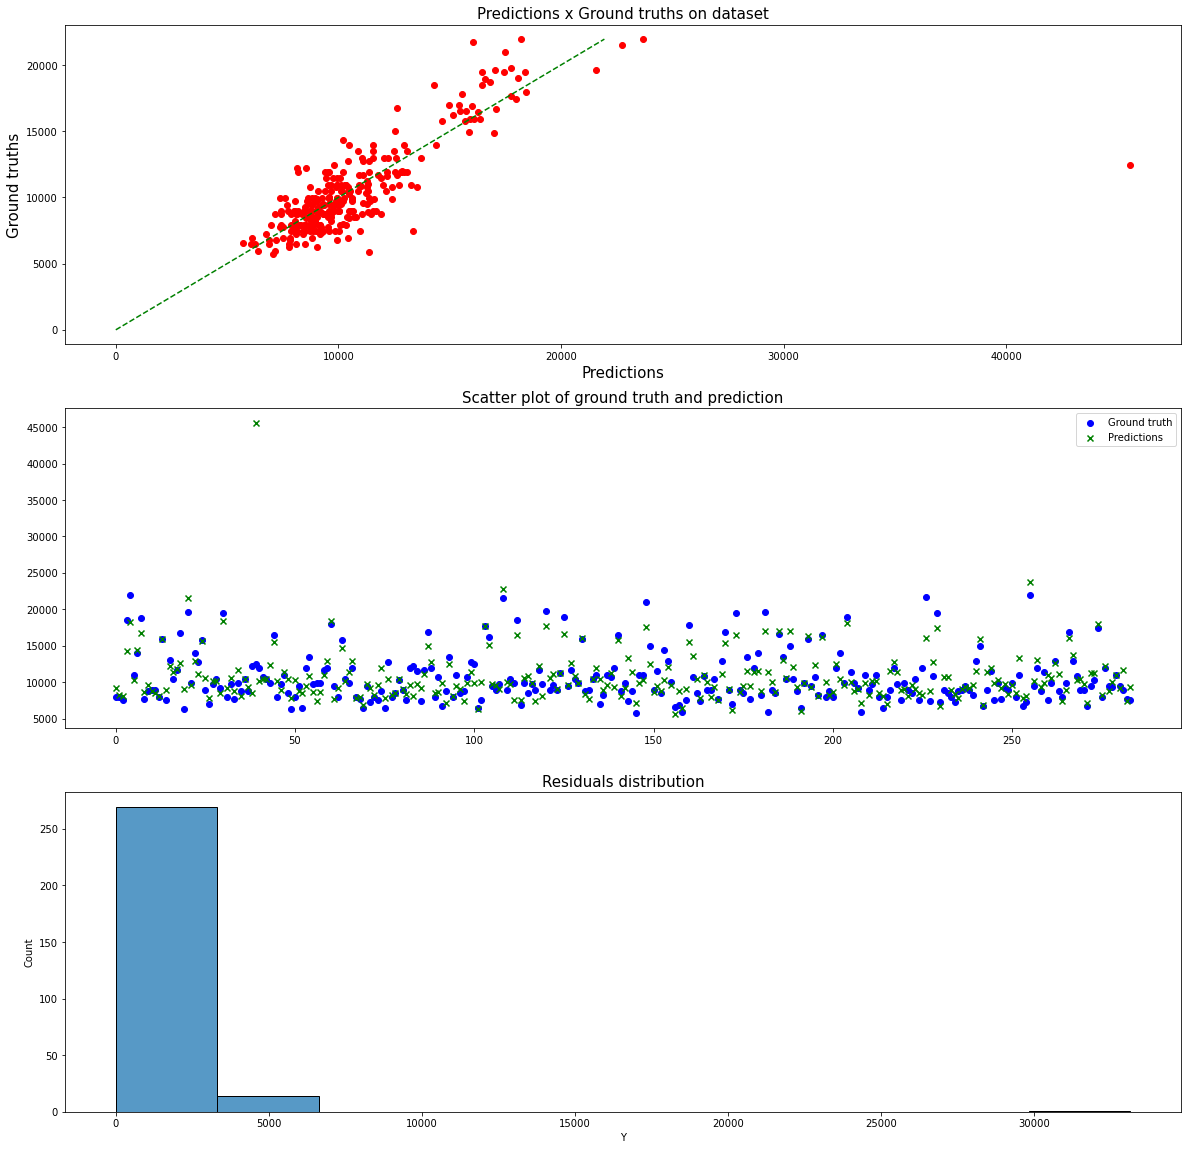

In [47]:
ann = build_model(input_shape=X_train.shape[1])
ann.fit(X_train, y_train, epochs=300)
ann_pred = ann.predict(X_test)
vis(y_test, ann_pred.reshape(-1))

In [48]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
estimator = KerasRegressor(build_fn = lambda: build_model(X.shape[1]), epochs=300, verbose=False)
ann_cv_results = cross_validate(estimator, X, y, cv=folds, scoring=cv_scoring_metrics)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                240       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_6 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 1,301
Trainable params: 1,301
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 30)                240       
______________________________

In [49]:
ann_dict = read_cv_test_result(ann_cv_results)

   fit_time  score_time   test_r2  test_neg_mean_squared_error  \
0  6.616612    0.066000  0.440913                -6.541857e+06   
1  6.799634    0.065999  0.712525                -3.323778e+06   
2  6.685480    0.063156  0.742509                -3.044642e+06   
3  6.833548    0.067089  0.447936                -5.716383e+06   
4  6.769589    0.067453  0.663354                -3.818259e+06   

   test_neg_mean_absolute_error  test_neg_root_mean_squared_error  
0                  -1332.803242                      -2557.705422  
1                  -1384.049378                      -1823.123221  
2                  -1300.994509                      -1744.890131  
3                  -1366.365623                      -2390.895759  
4                  -1353.275570                      -1954.036486  


# Conclusion

In [50]:
conclusion_df = pd.DataFrame([lr_dict, dc_dict, rf_dict, xg_dict, ann_dict])
conclusion_df['Model name'] = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'ANN']
conclusion_df.set_index('Model name', inplace=True)
# conclusion_df.to_csv('Minmax_scaling.csv')
conclusion_df.head(10)

Average 5-fold test_r2  \
Model name                                  
Linear Regression                0.594552   
Decision Tree                    0.609257   
Random Forest                    0.750334   
XGBoost                          0.760611   
ANN                              0.601447   

                   Average 5-fold test_neg_mean_squared_error  \
Model name                                                      
Linear Regression                               -4.580077e+06   
Decision Tree                                   -4.417085e+06   
Random Forest                                   -2.827732e+06   
XGBoost                                         -2.716436e+06   
ANN                                             -4.488984e+06   

                   Average 5-fold test_neg_mean_absolute_error  \
Model name                                                       
Linear Regression                                 -1528.334422   
Decision Tree                                     -1512.950080   
Random Forest                                     -1213.435483   
XGBoost                                           -1213.698881   
ANN                                               -1347.497664   

                   Average 5-fold test_neg_root_mean_squared_error  
Model name                                                          
Linear Regression                                     -2135.209979  
Decision Tree                                         -2098.711374  
Random Forest                                         -1677.633232  
XGBoost                                               -1643.391130  
ANN                                                   -2094.130204

* As expected, linear regression works for certain extend.
* Tree Esemble methods perform best on this problem. Howerver, single tree is prone to overfitting
* Set of feature importance shown and confirmed in XGBoost
* ANN functions better with scaled data.
--> Lesson learn: data scaling is highly recommended, request more data, apply regulizations to ANN